Installing Dependecies

In [93]:
!pip install ultralytics
!pip install roboflow  # For dataset handling
!pip install opencv-python
!pip install torch torchvision torchaudio


Importing the libraries

In [94]:
import torch
import cv2
import os
import glob
import numpy as np
from ultralytics import YOLO

Installing Kaggle to download the Dataset

In [95]:
!pip install kaggle

Upload your Kaggle API Key

In [96]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"solankisarkar","key":"587401c4712d9ffab4b3d16ddd082394"}'}

In [97]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading and Unzipping the dataset

In [98]:
!kaggle datasets download -d engineeringubu/pharmaceutical-and-biomedical-waste -p /content --unzip

Dataset URL: https://www.kaggle.com/datasets/engineeringubu/pharmaceutical-and-biomedical-waste
License(s): CC-BY-NC-SA-4.0


Displaying the different types of Hospital Waste

In [99]:
import os

dir_path = "/content/Pharmaceutical and Biomedical Waste (PBW)"

# List everything in the directory
items = os.listdir(dir_path)

print("Contents of the main directory:")
for item in items:
    print("-", item)

Contents of the main directory:
- (PP) Paper equipment-packaging
- (ME) Metal equipment -packaging
- Tweezers
- (BT) Body Tissue or Organ
- Gloves
- (PE) Plastic equipment-packaging
- (OW) Organic wastes
- (SN) Syringe needles
- Syringe
- Mask
- (GE) Glass equipment-packaging 551
- Gauze


Displaying few datasets

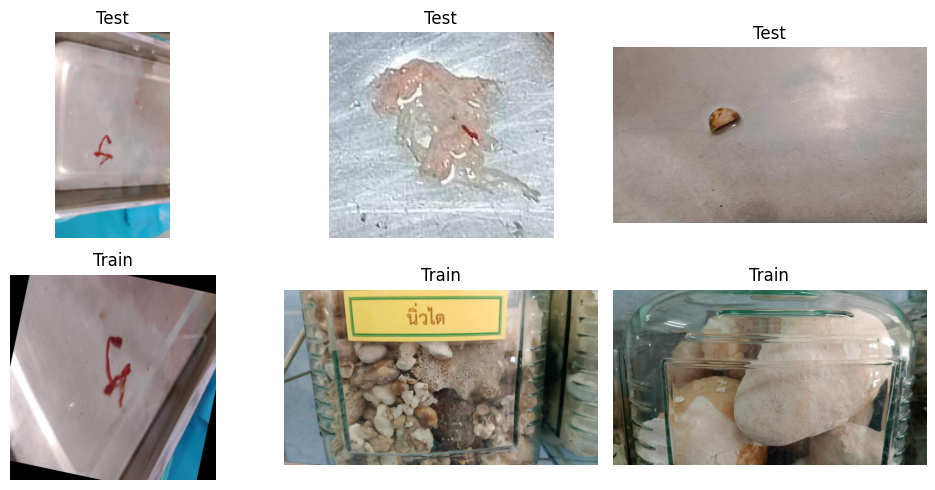

In [100]:
import cv2
import os
import matplotlib.pyplot as plt

# Define the paths
test_images_path = "/content/Pharmaceutical and Biomedical Waste (PBW)/(BT) Body Tissue or Organ/Test images"
train_images_path = "/content/Pharmaceutical and Biomedical Waste (PBW)/(BT) Body Tissue or Organ/Train images"

# Get image files
num_samples = 6  # Make it even for easier grid layout
image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')

# Get first few images from both folders
test_images = [f for f in os.listdir(test_images_path) if f.lower().endswith(image_extensions)][:num_samples//2]
train_images = [f for f in os.listdir(train_images_path) if f.lower().endswith(image_extensions)][:num_samples//2]

# Combine images from both folders
sample_images = [(os.path.join(test_images_path, img), "Test") for img in test_images] + \
                [(os.path.join(train_images_path, img), "Train") for img in train_images]

# Set up a flexible grid
num_rows = 2
num_cols = len(sample_images) // num_rows

plt.figure(figsize=(10, 5))
for i, (img_path, label) in enumerate(sample_images):
    image = cv2.imread(img_path)
    if image is None:
        print(f"Skipping {img_path} (could not load image)")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for correct color display

    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(label)

plt.tight_layout()
plt.show()

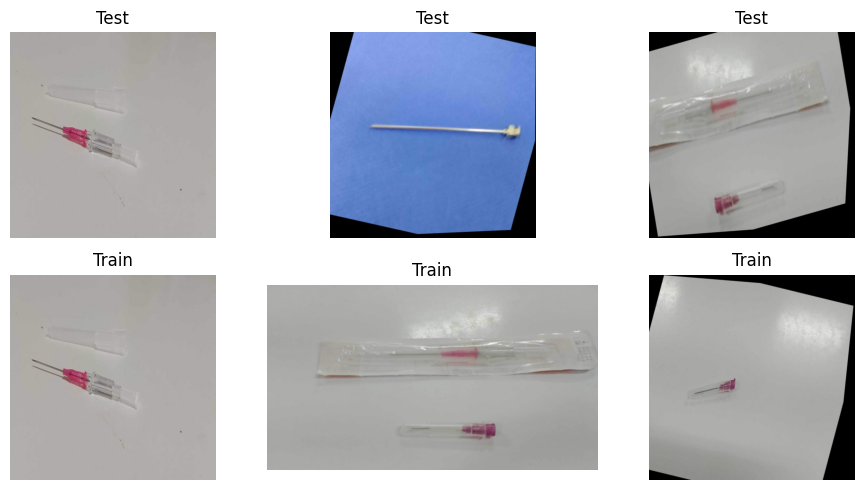

In [101]:
import cv2
import os
import matplotlib.pyplot as plt

# Define the paths
test_images_path = "/content/Pharmaceutical and Biomedical Waste (PBW)/(SN) Syringe needles/Test images"
train_images_path = "/content/Pharmaceutical and Biomedical Waste (PBW)/(SN) Syringe needles/Train images"

# Get image files
num_samples = 6  # Make it even for easier grid layout
image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')

# Get first few images from both folders
test_images = [f for f in os.listdir(test_images_path) if f.lower().endswith(image_extensions)][:num_samples//2]
train_images = [f for f in os.listdir(train_images_path) if f.lower().endswith(image_extensions)][:num_samples//2]

# Combine images from both folders
sample_images = [(os.path.join(test_images_path, img), "Test") for img in test_images] + \
                [(os.path.join(train_images_path, img), "Train") for img in train_images]

# Set up a flexible grid
num_rows = 2
num_cols = len(sample_images) // num_rows

plt.figure(figsize=(10, 5))
for i, (img_path, label) in enumerate(sample_images):
    image = cv2.imread(img_path)
    if image is None:
        print(f"Skipping {img_path} (could not load image)")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for correct color display

    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(label)

plt.tight_layout()
plt.show()

Loading the YOLOv8 model

In [55]:
# Load the YOLOv8 model (n = nano, s = small, m = medium)
model = YOLO("yolov8n.pt")  # Choose the right model size

Creating the train, test and val directories for images and labels

In [56]:
import os

base_dir = "/content/Pharmaceutical_and_Biomedical_Waste"

folders = [
    "images/train", "images/val", "images/test",
    "labels/train", "labels/val", "labels/test"
]

for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

print("Folder structure created successfully!")


Folder structure created successfully!


In [57]:
!ls -R /content/Pharmaceutical_and_Biomedical_Waste

/content/Pharmaceutical_and_Biomedical_Waste:
images	labels

/content/Pharmaceutical_and_Biomedical_Waste/images:
test  train  val

/content/Pharmaceutical_and_Biomedical_Waste/images/test:
 IMG_6261_JPG.rf.adc88e45d3dca4833d7a72e800a15b41.jpg
 IMG_6284_JPG.rf.05f16815f0e12ad92b1b766651caf8d1.jpg
 IMG_6289_JPG.rf.301b8c0123f7b9ff10907014045eb689.jpg
 IMG_6291_JPG.rf.0ba2153793eae3e74b10a726b12787e0.jpg
 IMG_6296_JPG.rf.88266a7caa8dc5711062aeac9012f041.jpg
 IMG_6297_JPG.rf.37c3302a0dee0c4b10847844978f5185.jpg
 IMG_6298_JPG.rf.0b6983fffe9be6fe47cef30d55970bf0.jpg
 IMG_6300_JPG.rf.dc2a74598a1f3ec6b13db81bdf3ac06e.jpg
 IMG_6304_JPG.rf.d07edcce06dec3c1393dcebfe4da1708.jpg
 IMG_6307_JPG.rf.d6ce20aea84e134728ed02030bf7d601.jpg
 IMG_6310_JPG.rf.3ee6aecea32fe6a7589a31f257ff5317.jpg
 IMG_6311_JPG.rf.6512cae823c690cb9a64bb9829049f36.jpg
 IMG_6313_JPG.rf.35b5824e658e2d9f6629b5e7706f876a.jpg
 IMG_6316_JPG.rf.69569dd767ebab5ace7137d5eeef4c5b.jpg
 IMG_6319_JPG.rf.cc0e0f1ade09b1bef4fd2ef7cf140e45.jpg


In [58]:
import os
dataset_path = "/content/Pharmaceutical_and_Biomedical_Waste/"
print(os.listdir(dataset_path))

['images', 'labels']


In [59]:
import os
import shutil
import random

# Define correct paths
dataset_path = "/content/Pharmaceutical and Biomedical Waste (PBW)/(BT) Body Tissue or Organ/Test images/"
output_path = "/content/Pharmaceutical_and_Biomedical_Waste/"

# Create output directories
os.makedirs(output_path + "images/train", exist_ok=True)
os.makedirs(output_path + "images/val", exist_ok=True)
os.makedirs(output_path + "images/test", exist_ok=True)

# List all images correctly
all_images = [f for f in os.listdir(dataset_path) if f.endswith(".jpg") or f.endswith(".png")]

# Debugging: Check if images are detected
print(f"Found {len(all_images)} images in '{dataset_path}'")

# Shuffle and split dataset
random.shuffle(all_images)
train_split = int(0.8 * len(all_images))
val_split = train_split + int(0.1 * len(all_images))  # Fix here

train_images = all_images[:train_split]
val_images = all_images[train_split:val_split]
test_images = all_images[val_split:]

# Move images to respective directories
for img in train_images:
    shutil.move(os.path.join(dataset_path, img), os.path.join(output_path, "images/train", img))

for img in val_images:
    shutil.move(os.path.join(dataset_path, img), os.path.join(output_path, "images/val", img))

for img in test_images:
    shutil.move(os.path.join(dataset_path, img), os.path.join(output_path, "images/test", img))

print("✅ Dataset successfully split into train, val, and test sets.")


Found 104 images in '/content/Pharmaceutical and Biomedical Waste (PBW)/(BT) Body Tissue or Organ/Test images/'
✅ Dataset successfully split into train, val, and test sets.


In [60]:
import os
import shutil
import random

# Define paths
dataset_path = "/content/Pharmaceutical and Biomedical Waste (PBW)/"  # Update this path
output_path = os.path.join("/content/Pharmaceutical_and_Biomedical_Waste", "images")  # Main output directory

# Ensure output bin folders exist for train, val, test
bin_folders = {
    "Black": {"train": os.path.join(output_path, "train/Black"),
              "val": os.path.join(output_path, "val/Black"),
              "test": os.path.join(output_path, "test/Black")},

    "Blue": {"train": os.path.join(output_path, "train/Blue"),
             "val": os.path.join(output_path, "val/Blue"),
             "test": os.path.join(output_path, "test/Blue")},

    "Red": {"train": os.path.join(output_path, "train/Red"),
            "val": os.path.join(output_path, "val/Red"),
            "test": os.path.join(output_path, "test/Red")},

    "Yellow": {"train": os.path.join(output_path, "train/Yellow"),
               "val": os.path.join(output_path, "val/Yellow"),
               "test": os.path.join(output_path, "test/Yellow")}
}

# Create directories if they don't exist
for color in bin_folders:
    for split in ["train", "val", "test"]:
        os.makedirs(bin_folders[color][split], exist_ok=True)

# Define category-to-bin mapping
category_to_bin = {
    "(BT) Body Tissue or Organ": "Yellow",
    "(GE) Glass equipment-packaging 551": "Blue",
    "(ME) Metal equipment -packaging": "Black",
    "(OW) Organic wastes": "Yellow",
    "(PE) Plastic equipment-packaging": "Red",
    "(PP) Paper equipment-packaging": "Blue",
    "(SN) Syringe needles": "Black",
    "Gauze": "Yellow",
    "Gloves": "Yellow",
    "Syringe": "Red",
    "Tweezers": "Black",
    "Mask": "Yellow"
}

# Move images based on category-bin mapping and split into train, val, test
for category, bin_color in category_to_bin.items():
    source_path = os.path.join(dataset_path, category, "Test images")

    if not os.path.exists(source_path):
        print(f"⚠️ Skipping missing folder: {source_path}")
        continue

    # Get all images
    images = [f for f in os.listdir(source_path) if f.endswith((".jpg", ".png"))]

    # Shuffle images randomly
    random.shuffle(images)

    # Split into 80% train, 10% val, 10% test
    train_split = int(0.8 * len(images))
    val_split = train_split + int(0.1 * len(images))

    train_images = images[:train_split]
    val_images = images[train_split:val_split]
    test_images = images[val_split:]

    # Move images to respective folders
    for img in train_images:
        shutil.move(os.path.join(source_path, img), os.path.join(bin_folders[bin_color]["train"], img))

    for img in val_images:
        shutil.move(os.path.join(source_path, img), os.path.join(bin_folders[bin_color]["val"], img))

    for img in test_images:
        shutil.move(os.path.join(source_path, img), os.path.join(bin_folders[bin_color]["test"], img))

    print(f"✅ Moved {len(images)} images from {category} → {bin_color} bin (Train: {len(train_images)}, Val: {len(val_images)}, Test: {len(test_images)})")

print("🎯 All images moved and split successfully!")


✅ Moved 0 images from (BT) Body Tissue or Organ → Yellow bin (Train: 0, Val: 0, Test: 0)
✅ Moved 111 images from (GE) Glass equipment-packaging 551 → Blue bin (Train: 88, Val: 11, Test: 12)
✅ Moved 82 images from (ME) Metal equipment -packaging → Black bin (Train: 65, Val: 8, Test: 9)
✅ Moved 117 images from (OW) Organic wastes → Yellow bin (Train: 93, Val: 11, Test: 13)
✅ Moved 112 images from (PE) Plastic equipment-packaging → Red bin (Train: 89, Val: 11, Test: 12)
✅ Moved 47 images from (PP) Paper equipment-packaging → Blue bin (Train: 37, Val: 4, Test: 6)
✅ Moved 119 images from (SN) Syringe needles → Black bin (Train: 95, Val: 11, Test: 13)
✅ Moved 115 images from Gauze → Yellow bin (Train: 92, Val: 11, Test: 12)
✅ Moved 109 images from Gloves → Yellow bin (Train: 87, Val: 10, Test: 12)
✅ Moved 114 images from Syringe → Red bin (Train: 91, Val: 11, Test: 12)
✅ Moved 113 images from Tweezers → Black bin (Train: 90, Val: 11, Test: 12)
✅ Moved 110 images from Mask → Yellow bin (Train

In [61]:
import os

moved_images_path = "/content/Pharmaceutical_and_Biomedical_Waste/images/test"  # Change to train/val if needed

for bin_class in os.listdir(moved_images_path):
    bin_path = os.path.join(moved_images_path, bin_class)
    if os.path.isdir(bin_path):
        images = [f for f in os.listdir(bin_path) if f.endswith(".jpg") or f.endswith(".png")]
        print(f"📂 {bin_class}: {len(images)} images found")


📂 Yellow: 48 images found
📂 Red: 24 images found
📂 Blue: 18 images found
📂 Black: 34 images found


In [62]:
import os

moved_images_path = "/content/Pharmaceutical_and_Biomedical_Waste/images/train"  # Change to train/val if needed

for bin_class in os.listdir(moved_images_path):
    bin_path = os.path.join(moved_images_path, bin_class)
    if os.path.isdir(bin_path):
        images = [f for f in os.listdir(bin_path) if f.endswith(".jpg") or f.endswith(".png")]
        print(f"📂 {bin_class}: {len(images)} images found")

📂 Yellow: 360 images found
📂 Red: 180 images found
📂 Blue: 125 images found
📂 Black: 250 images found


In [63]:
import os

moved_images_path = "/content/Pharmaceutical_and_Biomedical_Waste/images/val"  # Change to train/val if needed

for bin_class in os.listdir(moved_images_path):
    bin_path = os.path.join(moved_images_path, bin_class)
    if os.path.isdir(bin_path):
        images = [f for f in os.listdir(bin_path) if f.endswith(".jpg") or f.endswith(".png")]
        print(f"📂 {bin_class}: {len(images)} images found")

📂 Yellow: 43 images found
📂 Red: 22 images found
📂 Blue: 15 images found
📂 Black: 30 images found


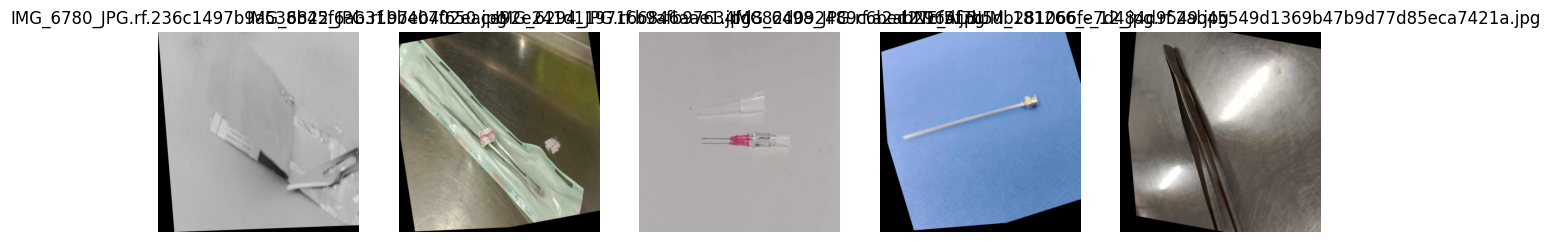

In [64]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

# Change folder as needed (train, val, or test)
bin_path = "/content/Pharmaceutical_and_Biomedical_Waste/images/train/Black"

# Get image files
image_files = [f for f in os.listdir(bin_path) if f.endswith(".jpg") or f.endswith(".png")]

# Display 5 random images
num_images_to_show = min(5, len(image_files))  # Limit to available images
sample_images = random.sample(image_files, num_images_to_show)

# Plot images
fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 5))

for ax, img_name in zip(axes, sample_images):
    img_path = os.path.join(bin_path, img_name)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(img_name)
    ax.axis("off")

plt.show()


In [65]:
!rm /content/Pharmaceutical_and_Biomedical_Waste/images/test/*.*

In [21]:
!rm -rf /content/Pharmaceutical_and_Biomedical_Waste/labels/test/*
!rm -rf /content/Pharmaceutical_and_Biomedical_Waste/labels/test
!rm -rf /content/Pharmaceutical_and_Biomedical_Waste/labels/train
!rm -rf /content/Pharmaceutical_and_Biomedical_Waste/labels/val

Uploading the label files for train, test and val  

In [22]:
from google.colab import files
uploaded = files.upload()  # Opens a file selection window

Saving train.zip to train.zip
Saving val.zip to val.zip
Saving test.zip to test.zip


In [23]:
!unzip train.zip -d /content/Pharmaceutical_and_Biomedical_Waste/labels/
!unzip val.zip -d /content/Pharmaceutical_and_Biomedical_Waste/labels/
!unzip test.zip -d /content/Pharmaceutical_and_Biomedical_Waste/labels/

Archive:  train.zip
   creating: /content/Pharmaceutical_and_Biomedical_Waste/labels/train/
  inflating: /content/Pharmaceutical_and_Biomedical_Waste/labels/train/IMG_6261_JPG.rf.adc88e45d3dca4833d7a72e800a15b41.txt  
  inflating: /content/Pharmaceutical_and_Biomedical_Waste/labels/train/IMG_6262_JPG.rf.8c00e7988f0549d30493e1e141deeb4e.txt  
  inflating: /content/Pharmaceutical_and_Biomedical_Waste/labels/train/IMG_6263_JPG.rf.25fa9d84c0ea51568153b24c7428af87.txt  
  inflating: /content/Pharmaceutical_and_Biomedical_Waste/labels/train/IMG_6263_JPG.rf.9677299f67272826a8cfc9dedcbe2c72.txt  
  inflating: /content/Pharmaceutical_and_Biomedical_Waste/labels/train/IMG_6264_JPG.rf.3f6c56d298597d2e6f64e14342acb6cb.txt  
  inflating: /content/Pharmaceutical_and_Biomedical_Waste/labels/train/IMG_6265_JPG.rf.7556d5b430e9c4684601b05393df8011.txt  
  inflating: /content/Pharmaceutical_and_Biomedical_Waste/labels/train/IMG_6265_JPG.rf.fa1c221d9aa4209e7cf825ed50550977.txt  
  inflating: /content/Phar

Creating the YAML file.

In [24]:
yaml_content = """train: /content/Pharmaceutical_and_Biomedical_Waste/images/train
val: /content/Pharmaceutical_and_Biomedical_Waste/images/val
test: /content/Pharmaceutical_and_Biomedical_Waste/images/test

nc: 4  # Number of classes

names: ["Red bin", "Blue bin", "Black bin", "Yellow bin"]
"""
#name order should be same as the order you label your images
# Write to a file
with open("/content/data.yaml", "w") as f:
    f.write(yaml_content)

print("data.yaml file created successfully!")

data.yaml file created successfully!


In [25]:
from ultralytics import YOLO

In [26]:
# Move images from color subdirectories to their parent directories
!mv /content/Pharmaceutical_and_Biomedical_Waste/images/train/Black/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/train/
!mv /content/Pharmaceutical_and_Biomedical_Waste/images/train/Blue/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/train/
!mv /content/Pharmaceutical_and_Biomedical_Waste/images/train/Red/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/train/
!mv /content/Pharmaceutical_and_Biomedical_Waste/images/train/Yellow/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/train/


!mv /content/Pharmaceutical_and_Biomedical_Waste/images/test/Black/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/test/
!mv /content/Pharmaceutical_and_Biomedical_Waste/images/test/Blue/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/test/
!mv /content/Pharmaceutical_and_Biomedical_Waste/images/test/Red/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/test/
!mv /content/Pharmaceutical_and_Biomedical_Waste/images/test/Yellow/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/test/

!mv /content/Pharmaceutical_and_Biomedical_Waste/images/val/Black/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/val/
!mv /content/Pharmaceutical_and_Biomedical_Waste/images/val/Blue/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/val/
!mv /content/Pharmaceutical_and_Biomedical_Waste/images/val/Red/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/val/
!mv /content/Pharmaceutical_and_Biomedical_Waste/images/val/Yellow/*.jpg /content/Pharmaceutical_and_Biomedical_Waste/images/val/


# Remove empty subdirectories
!rm -r /content/Pharmaceutical_and_Biomedical_Waste/images/train/*/
!rm -r /content/Pharmaceutical_and_Biomedical_Waste/images/val/*/
!rm -r /content/Pharmaceutical_and_Biomedical_Waste/images/test/*/


In [27]:
import os
import shutil

# Define base dataset path
dataset_path = "/content/Pharmaceutical_and_Biomedical_Waste"  # Change this to your actual dataset path

# Define folder names for train, test, val
splits = ["train", "test", "val"]

for split in splits:
    print(f"\nProcessing {split} dataset...")

    # Define image and label paths
    images_folder = os.path.join(dataset_path, "images", split)
    labels_folder = os.path.join(dataset_path, "labels", split)

    # Get list of images and labels
    image_files = {os.path.splitext(f)[0] for f in os.listdir(images_folder) if f.endswith(('.jpg', '.png'))}
    label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_folder) if f.endswith('.txt')}

    # Find images that do not have corresponding label files
    missing_labels = image_files - label_files
    print(f"Found {len(missing_labels)} images without labels in {split}.")

    for missing in missing_labels:
        missing_label_name = missing + ".txt"
        found = False

        # Search for the missing label in all label folders
        for search_split in splits:
            search_folder = os.path.join(dataset_path, "labels", search_split)
            search_path = os.path.join(search_folder, missing_label_name)

            if os.path.exists(search_path):
                # Move the missing label to the correct folder
                shutil.move(search_path, labels_folder)
                print(f"Moved {missing_label_name} from {search_split} to {split}.")
                found = True
                break

        if not found:
            print(f"Warning: No label file found for {missing}.")

print("\nLabel sorting complete!")



Processing train dataset...
Found 272 images without labels in train.
Moved IMG_6329_JPG.rf.255acd591e9c540782132fd7f83770d9.txt from test to train.
Moved IMG_6299_JPG.rf.7333655b5ac00076d364aafa8b0fe453.txt from test to train.
Moved LINE_ALBUM_191266_-_142_jpg.rf.4029c9e8ba99ab9b7ccc1fe712e971df.txt from test to train.
Moved LINE_ALBUM_-_-_60_jpg.rf.e290d9cbca1ac84cfdabc1c6a682e5e9.txt from val to train.
Moved IMG_6892_JPG.rf.6962e0108d38c9ae9e358c26305af2c1.txt from test to train.
Moved IMG_6295_JPG.rf.b4cb2acf56a3fa710627283510a0c5d8.txt from val to train.
Moved IMG_6600_JPG.rf.6ff36da761f8047d67f35ee68c396d91.txt from test to train.
Moved S__8667179_jpg.rf.e27538b82ea07be3fd59e22bdea68b92.txt from test to train.
Moved IMG_6875_JPG.rf.b26ceebc0c5f307340b9ba6c05faea5a.txt from val to train.
Moved LINE_ALBUM_181266_-_11_jpg.rf.dbaedab61672babe968d1eaf24838d34.txt from val to train.
Moved IMG_6901_JPG.rf.9256721ed529baf95d7966bda5bb967d.txt from val to train.
Moved IMG_6887_JPG.rf.c33

In [28]:
import os

image_folder = "/content/Pharmaceutical_and_Biomedical_Waste/images/train"  # Change to your actual path
label_folder = "/content/Pharmaceutical_and_Biomedical_Waste/labels/train"

image_files = {f.rsplit(".", 1)[0] for f in os.listdir(image_folder) if f.endswith(".jpg")}
label_files = {f.rsplit(".", 1)[0] for f in os.listdir(label_folder) if f.endswith(".txt")}

missing_labels = image_files - label_files  # Find images with missing labels

if missing_labels:
    print("Missing label files for:")
    for filename in missing_labels:
        print(f"{filename}.txt")
else:
    print("All images have corresponding labels.")


Missing label files for:
IMG_6482_JPG.rf.2a7b3a7c24acc80dcfe57782d1815c15.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_30.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_59.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_17.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_37.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_36.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_5.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_9.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_42.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_19.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_95.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_112.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_103.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_43.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_8.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_83.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_41.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_91.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_116.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_15.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_23.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_31.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_127.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_82.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_86.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_79.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_114.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_97.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_93.txt
LINE_ALBUM_ฝาก_๒๓๑๒๑๘_38.txt
LINE_ALBUM_191266_๒๓๑๒๑๙_74.txt
LINE_ALB

Training the model

In [66]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(data="data.yaml", epochs=50, imgsz=640)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

train: Scanning /content/Pharmaceutical_and_Biomedical_Waste/labels/train/Black... 914 images, 1017 backgrounds, 0 corrupt: 100%|██████████| 1931/1931 [00:00<00:00, 3282.80it/s]


train: New cache created: /content/Pharmaceutical_and_Biomedical_Waste/labels/train/Black.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Pharmaceutical_and_Biomedical_Waste/labels/val/Black... 109 images, 131 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<00:00, 1666.22it/s]

val: New cache created: /content/Pharmaceutical_and_Biomedical_Waste/labels/val/Black.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.12G       1.41      3.696      1.876         11        640: 100%|██████████| 121/121 [00:37<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        240        109      0.179      0.346      0.155     0.0652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.3G      1.406      3.043      1.818          9        640: 100%|██████████| 121/121 [00:32<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]


                   all        240        109      0.571      0.266      0.111     0.0363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.31G      1.507      2.822       1.89          8        640: 100%|██████████| 121/121 [00:33<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        240        109      0.143      0.351      0.142     0.0616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.33G      1.519      2.546      1.876          9        640: 100%|██████████| 121/121 [00:33<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]


                   all        240        109      0.215      0.385       0.22     0.0832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.35G      1.472      2.343      1.826         10        640: 100%|██████████| 121/121 [00:34<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]

                   all        240        109      0.102      0.309     0.0865     0.0384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.36G      1.434      2.217      1.785         12        640: 100%|██████████| 121/121 [00:35<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        240        109      0.329      0.485      0.369      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.38G      1.412       2.13      1.764         10        640: 100%|██████████| 121/121 [00:35<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        240        109      0.385      0.541      0.391       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.4G      1.389      2.072      1.762         13        640: 100%|██████████| 121/121 [00:34<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        240        109      0.257      0.689      0.381      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.41G      1.376      2.056      1.727         10        640: 100%|██████████| 121/121 [00:35<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]

                   all        240        109      0.243      0.576      0.382      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.43G       1.35      1.933      1.698         11        640: 100%|██████████| 121/121 [00:34<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]

                   all        240        109      0.259      0.408      0.269      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.45G      1.338      1.894      1.704         11        640: 100%|██████████| 121/121 [00:35<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]

                   all        240        109       0.35        0.7      0.426      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.46G      1.308      1.822      1.681         13        640: 100%|██████████| 121/121 [00:34<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        240        109      0.298      0.673      0.397      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.48G      1.329      1.783      1.685          9        640: 100%|██████████| 121/121 [00:33<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        240        109      0.408      0.725      0.473      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.5G      1.309      1.782      1.664         15        640: 100%|██████████| 121/121 [00:33<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all        240        109      0.405      0.807      0.486      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.52G      1.314      1.748      1.655          9        640: 100%|██████████| 121/121 [00:33<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]

                   all        240        109      0.423      0.731      0.482      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.53G      1.281      1.749      1.639         19        640: 100%|██████████| 121/121 [00:34<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        240        109      0.449      0.825      0.527        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.55G      1.265      1.683      1.626         18        640: 100%|██████████| 121/121 [00:33<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all        240        109      0.419      0.685      0.497      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.57G      1.259      1.626      1.626         13        640: 100%|██████████| 121/121 [00:32<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        240        109      0.389      0.777      0.424      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.58G      1.268      1.638      1.625         16        640: 100%|██████████| 121/121 [00:33<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]

                   all        240        109      0.435      0.786      0.473      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.6G      1.244      1.576      1.603         21        640: 100%|██████████| 121/121 [00:33<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.02it/s]

                   all        240        109      0.418      0.843      0.486      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.62G      1.223      1.585       1.59         11        640: 100%|██████████| 121/121 [00:32<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]

                   all        240        109       0.45      0.877      0.486      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.63G      1.214      1.594      1.599         12        640: 100%|██████████| 121/121 [00:33<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]

                   all        240        109      0.453      0.903      0.491      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.65G      1.191      1.534      1.571         14        640: 100%|██████████| 121/121 [00:33<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        240        109      0.429      0.901      0.521      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.67G      1.187      1.544      1.575         15        640: 100%|██████████| 121/121 [00:32<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.63it/s]

                   all        240        109      0.438      0.881      0.519      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.69G      1.187      1.521      1.559         13        640: 100%|██████████| 121/121 [00:34<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.68it/s]

                   all        240        109       0.43      0.755      0.475      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.7G      1.187      1.507      1.548         13        640: 100%|██████████| 121/121 [00:33<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]

                   all        240        109      0.457      0.932      0.528      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.72G      1.168      1.439      1.544         16        640: 100%|██████████| 121/121 [00:34<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.37it/s]

                   all        240        109      0.411       0.84      0.483      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.74G      1.174      1.508      1.539         10        640: 100%|██████████| 121/121 [00:36<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        240        109      0.442      0.851      0.489      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.75G      1.154      1.433      1.537         13        640: 100%|██████████| 121/121 [00:34<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.96it/s]

                   all        240        109      0.441      0.898      0.493      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.77G      1.167      1.472      1.538         16        640: 100%|██████████| 121/121 [00:38<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        240        109      0.434      0.829      0.498      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.79G      1.124      1.451      1.512         12        640: 100%|██████████| 121/121 [00:33<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]

                   all        240        109       0.45      0.906      0.516      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.8G      1.119      1.461      1.505         11        640: 100%|██████████| 121/121 [00:34<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        240        109      0.462      0.902      0.534       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.82G      1.116      1.374      1.501         16        640: 100%|██████████| 121/121 [00:33<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]

                   all        240        109      0.448      0.929      0.521      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.84G      1.102      1.374      1.502         13        640: 100%|██████████| 121/121 [00:32<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        240        109      0.449      0.903      0.529      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.86G       1.13      1.419       1.52         16        640: 100%|██████████| 121/121 [00:34<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]

                   all        240        109      0.456      0.901      0.508      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.88G      1.123      1.364      1.512         10        640: 100%|██████████| 121/121 [00:36<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]

                   all        240        109       0.43      0.875      0.506      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.89G      1.123      1.399      1.501         11        640: 100%|██████████| 121/121 [00:33<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.05it/s]

                   all        240        109      0.441      0.902      0.508       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.91G      1.073      1.334      1.471         13        640: 100%|██████████| 121/121 [00:35<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

                   all        240        109      0.452      0.885      0.501      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.92G      1.064      1.347      1.465         14        640: 100%|██████████| 121/121 [00:34<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]

                   all        240        109      0.458      0.903      0.507      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.94G      1.073      1.331      1.475         13        640: 100%|██████████| 121/121 [00:37<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        240        109      0.449      0.926      0.497      0.324


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.96G      1.091      1.217       1.72          5        640: 100%|██████████| 121/121 [00:33<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        240        109      0.461      0.889       0.51      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.98G      1.038      1.136      1.633          8        640: 100%|██████████| 121/121 [00:30<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all        240        109      0.468      0.934      0.509      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.99G      1.027      1.112       1.65          6        640: 100%|██████████| 121/121 [00:33<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        240        109      0.464      0.948      0.504      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.01G      1.028      1.115      1.636          2        640: 100%|██████████| 121/121 [00:30<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all        240        109      0.455      0.937      0.508      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.03G      1.026      1.114      1.629          5        640: 100%|██████████| 121/121 [00:31<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.60it/s]

                   all        240        109      0.451      0.885      0.506      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.04G      0.995      1.092      1.595          6        640: 100%|██████████| 121/121 [00:31<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]

                   all        240        109      0.455      0.913      0.522      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.06G     0.9847      1.073      1.605          3        640: 100%|██████████| 121/121 [00:31<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]

                   all        240        109      0.455      0.911      0.513      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.08G     0.9909      1.119      1.607          3        640: 100%|██████████| 121/121 [00:32<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]

                   all        240        109      0.454      0.921      0.502      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       3.1G     0.9632      1.074      1.593          6        640: 100%|██████████| 121/121 [00:31<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]

                   all        240        109       0.45      0.932      0.506      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.11G     0.9363      1.055      1.542          6        640: 100%|██████████| 121/121 [00:32<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.01it/s]

                   all        240        109      0.451      0.929       0.51      0.349



50 epochs completed in 0.508 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]


                   all        240        109      0.455      0.913      0.522      0.351
               Red bin         22         22      0.456      0.915      0.525      0.327
              Blue bin         15         15      0.468      0.933      0.571      0.398
             Black bin         29         29      0.407      0.828       0.47      0.294
            Yellow bin         43         43      0.487      0.977      0.521      0.386
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79600b908990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Evaluating the model

In [67]:
model.val()

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Pharmaceutical_and_Biomedical_Waste/labels/val/Black.cache... 109 images, 131 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]


                   all        240        109      0.455      0.913      0.517      0.348
               Red bin         22         22      0.456      0.916      0.525      0.326
              Blue bin         15         15      0.468      0.933      0.548       0.38
             Black bin         29         29      0.406      0.828       0.47      0.294
            Yellow bin         43         43      0.487      0.977      0.527      0.391
Speed: 2.7ms preprocess, 4.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train32


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796093153850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Choosing the sample image to test the model

In [31]:
from google.colab import files

uploaded = files.upload()  # This will open a file upload dialog

Saving blood soaked cotton swabs.jpg to blood soaked cotton swabs.jpg


In [39]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


Choosing the model from different training sets

In [68]:
!ls runs/detect/train*/weights/

runs/detect/train3/weights/:
best.pt  last.pt

runs/detect/train/weights/:
best.pt  last.pt


In [73]:
!cp runs/detect/train3/weights/best.pt /content/best.pt

In [77]:
from ultralytics import YOLO
model = YOLO("/content/best.pt")  # Load the trained model

Testing the model.

In [87]:
results = model.predict("blood soaked cotton swabs.jpg", save=True, conf=0.32)


image 1/1 /content/blood soaked cotton swabs.jpg: 640x640 1 Yellow bin, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


Downloading the model

In [88]:
from google.colab import files
files.download("/content/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>